In [1]:
import csv
import pandas as pd
import numpy as np

df=pd.read_csv('/home/lavykoilpitchai/Dropbox/UU_Master/project_datascience/Bayessian_regressors_backup/data/fashion-mnist_train.csv')


mean=df.iloc[:, 1:].mean().mean()
std=df.iloc[:, 1:].std().mean()
df_norm=(df.iloc[:, 1:]-mean)/std
df_norm.insert(0, 'label', df['label'])
df_test = pd.read_csv('/home/lavykoilpitchai/Dropbox/UU_Master/project_datascience/Bayessian_regressors_backup/data/fashion-mnist_test.csv')
df_test_norm=(df_test.iloc[:, 1:]-mean)/std
df_test_norm.insert(0, 'label', df_test['label'])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images from the DataFrame
def display_images(df, indices, figsize=(12, 8)):
    
    n_images = len(indices)
    cols = min(5, n_images)  # Maximum 5 columns
    rows = (n_images + cols - 1) // cols  # Calculate rows needed
    
    plt.figure(figsize=figsize)
    
    for i, idx in enumerate(indices):
        plt.subplot(rows, cols, i + 1)
        
        # Get the label and pixel data
        label = df.iloc[idx, 0]
        pixels = df.iloc[idx, 1:].values
        image = pixels.reshape(28, 28)
        
        plt.imshow(image, cmap='gray')
        plt.title(f'Index: {idx}, Label: {label}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
# class names 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']    


Displaying one example from each class:


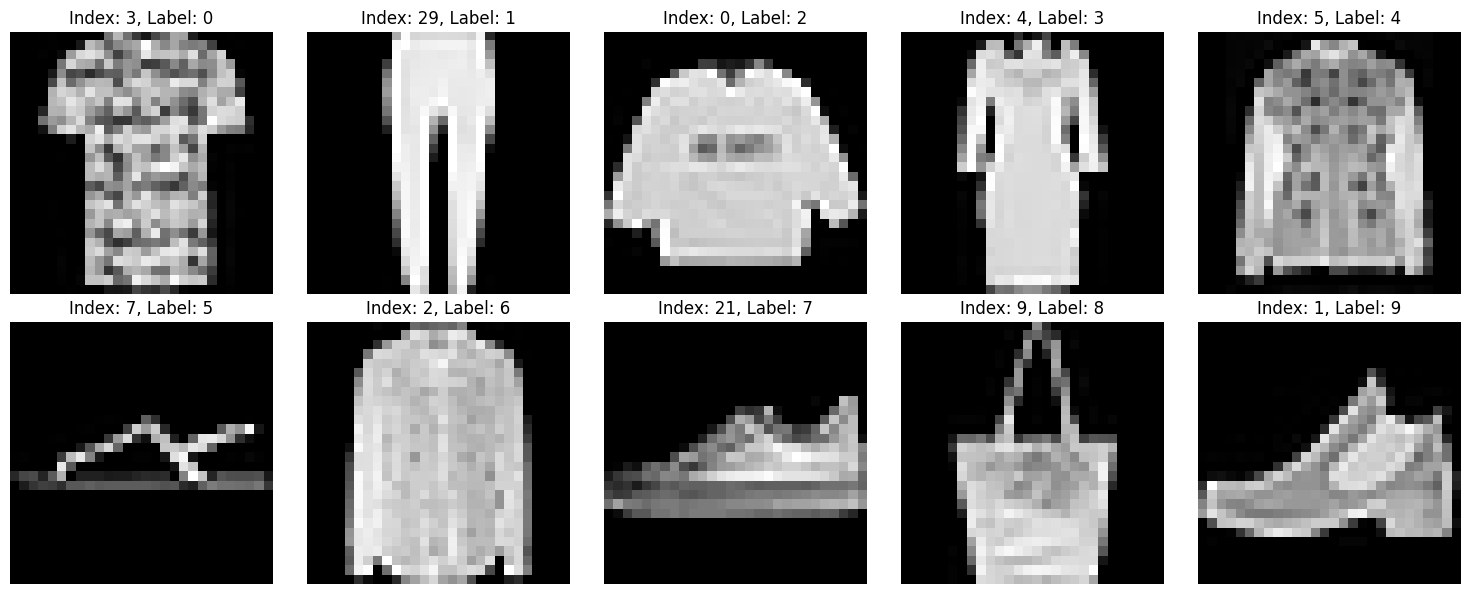

In [15]:
print("\nDisplaying one example from each class:")
one_per_class = []
for class_label in range(10):
    # collect indices of first occurrence of each class
    class_indices = df[df['label'] == class_label].index
    if len(class_indices) > 0:
        one_per_class.append(class_indices[0])
#display images 
display_images(df, one_per_class, figsize=(15, 6))        

In [16]:
# Load the test set
df_test = pd.read_csv('/home/lavykoilpitchai/Dropbox/UU_Master/project_datascience/Bayessian_regressors_backup/data/fashion-mnist_test.csv')
print(f"Test dataset shape: {df_test.shape}")



Test dataset shape: (10000, 785)


In [17]:
def hide_random(df_norm, hide_ratio=0.75, hidden_value=0):
   
    # Separate label and pixel block
    labels = df_norm.iloc[:, 0].to_numpy(copy=True)
    pixels = df_norm.iloc[:, 1:].to_numpy(copy=True)  # shape: (n_rows, n_pixels)

    n_rows, n_pixels = pixels.shape

    # Randomly mask the pixels
    mask = (np.random.rand(n_rows, n_pixels) < hide_ratio)
    pixels[mask] = hidden_value

    # Rebuild DataFrame with original column names
    hidden_df = pd.DataFrame(pixels, columns=df_norm.columns[1:], index=df_norm.index)
    hidden_df.insert(0, 'label', labels)
    return hidden_df

Original Images:


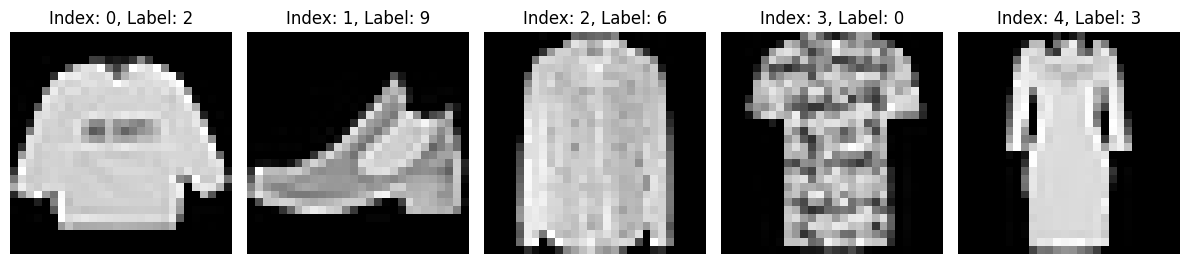

Images with 75% pixels hidden:


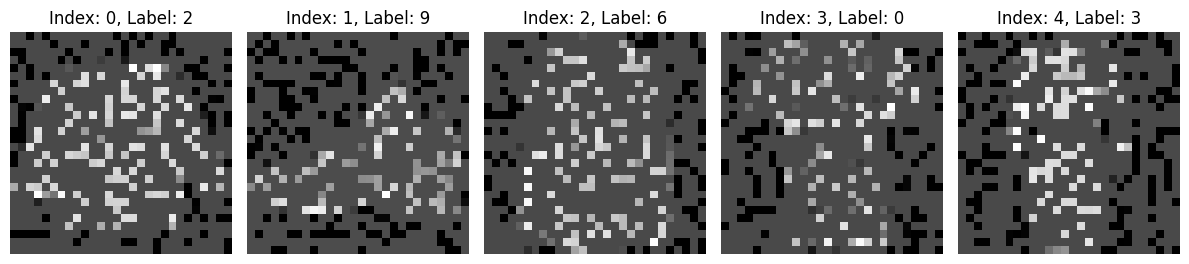

In [18]:
# original vs hidden comparison
df_copy=df_norm.copy()
df_hidden=hide_random(df_copy)
print("Original Images:")
display_images(df_copy, list(range(5)), figsize=(12, 6))
print("Images with 75% pixels hidden:")
display_images(df_hidden, list(range(5)), figsize=(12, 6))

In [19]:
#Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import accuracy_score, classification_report

X_train=df_hidden.iloc[:, 1:]
y_train=df_hidden['label']
X_test=df_test.iloc[:, 1:]
y_test=df_test['label']


gnb=GaussianNB(priors=np.ones(10) / 10)
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print(f" Gaussian Naive Bayes Classifier Accuracy: {accuracy*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))  


 Gaussian Naive Bayes Classifier Accuracy: 38.20%
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.02      0.04      1000
     Trouser       0.99      0.68      0.81      1000
    Pullover       0.62      0.01      0.01      1000
       Dress       0.87      0.39      0.54      1000
        Coat       0.20      1.00      0.33      1000
      Sandal       0.00      0.00      0.00      1000
       Shirt       0.00      0.00      0.00      1000
     Sneaker       1.00      0.00      0.00      1000
         Bag       0.37      0.78      0.50      1000
  Ankle boot       0.56      0.94      0.70      1000

    accuracy                           0.38     10000
   macro avg       0.55      0.38      0.29     10000
weighted avg       0.55      0.38      0.29     10000



/home/lavykoilpitchai/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lavykoilpitchai/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lavykoilpitchai/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [20]:
#Multinomial Naive Bayes Classifier on hidden images
from sklearn.naive_bayes import MultinomialNB    
from sklearn.metrics import accuracy_score, classification_report
df_copy=df.copy()
df_hidden=hide_random(df_copy)
X_train=df_hidden.iloc[:, 1:]
y_train=df_hidden['label']
X_test=df_test.iloc[:, 1:]
y_test=df_test['label']
model=MultinomialNB()
model.fit(X_train, y_train)
y_pred_hidden=model.predict(X_test)
accuracy_hidden=accuracy_score(y_test, y_pred_hidden)
print(f"Multinomial Naive Bayes Classifier on Hidden Images Accuracy: {accuracy_hidden*100:.2f}%")
print("Classification Report for Hidden Images:")
print(classification_report(y_test, y_pred_hidden, target_names=class_names))   

Multinomial Naive Bayes Classifier on Hidden Images Accuracy: 66.69%
Classification Report for Hidden Images:
              precision    recall  f1-score   support

 T-shirt/top       0.74      0.77      0.75      1000
     Trouser       0.97      0.90      0.94      1000
    Pullover       0.63      0.61      0.62      1000
       Dress       0.66      0.90      0.76      1000
        Coat       0.46      0.62      0.53      1000
      Sandal       0.72      0.16      0.26      1000
       Shirt       0.33      0.15      0.21      1000
     Sneaker       0.59      0.90      0.71      1000
         Bag       0.89      0.83      0.86      1000
  Ankle boot       0.69      0.82      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.64     10000
weighted avg       0.67      0.67      0.64     10000

